# 05_Investment_Efficiency.ipynb

## Title: "Investment Efficiency"

## Contents:

- Investment Efficiency metrics from SEC data.
- Validation against ---.sql. ##TODO
- Return on Assets/Investment (ROA/I) analysis.
- Comparative visualizations and insights.

---

# Set Up the Environment

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [2]:
from prepare_and_sort_data_annually import prepare_and_sort_financial_data

# Load Data

## Load Data from CSV File

In [3]:
raw_data = pd.read_csv('combined_df.csv')

In [5]:
# Inspect the first few rows of the dataset
raw_data.head(5)

,EntityName,CIK,Metric,start,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2012-01-01,2012-12-31,234000000,0000012927-14-000004,2013,FY,10-K,2014-02-14,CY2012
1,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2013-01-01,2013-12-31,213000000,0000012927-14-000004,2013,FY,10-K,2014-02-14,NaN
2,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2013-01-01,2013-12-31,213000000,0000012927-15-000011,2014,FY,10-K,2015-02-12,CY2013
3,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2014-01-01,2014-12-31,299000000,0000012927-15-000011,2014,FY,10-K,2015-02-12,NaN
4,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2014-01-01,2014-12-31,299000000,0000012927-16-000099,2015,FY,10-K,2016-02-10,CY2014


In [6]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [7]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  414 non-null    object        
 1   CIK         414 non-null    int64         
 2   Metric      414 non-null    object        
 3   start       298 non-null    object        
 4   end         414 non-null    datetime64[ns]
 5   val         414 non-null    int64         
 6   accn        414 non-null    object        
 7   fy          414 non-null    int64         
 8   fp          414 non-null    object        
 9   form        414 non-null    object        
 10  filed       414 non-null    object        
 11  frame       145 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 38.9+ KB


# Individual Metrics Analysis

## Analysis of CapitalExpendituresIncurredButNotYetPaid

In [11]:
# Filter out the Assets
unpaid_capita = raw_data[raw_data['Metric'] == 'CapitalExpendituresIncurredButNotYetPaid']

In [12]:
unpaid_capita_data = prepare_and_sort_financial_data(raw_data, 'CapitalExpendituresIncurredButNotYetPaid')

In [13]:
unpaid_capita_data.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
0,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2012-01-01,2012-12-31,234000000,2012,5
2,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2013-01-01,2013-12-31,213000000,2013,5
4,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2014-01-01,2014-12-31,299000000,2014,5
6,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2015-01-01,2015-12-31,502000000,2015,5
8,THE BOEING COMPANY,12927,CapitalExpendituresIncurredButNotYetPaid,2016-01-01,2016-12-31,292000000,2016,5


In [14]:
print(unpaid_capita_data.describe())

           CIK                            end           val  quarter
count     11.0                             11  1.100000e+01     11.0
mean   12927.0  2017-12-30 21:49:05.454545408  2.911818e+08      5.0
min    12927.0            2012-12-31 00:00:00  1.820000e+08      5.0
25%    12927.0            2015-07-01 12:00:00  2.235000e+08      5.0
50%    12927.0            2017-12-31 00:00:00  2.920000e+08      5.0
75%    12927.0            2020-07-01 00:00:00  3.185000e+08      5.0
max    12927.0            2022-12-31 00:00:00  5.020000e+08      5.0
std        0.0                            NaN  9.449848e+07      0.0


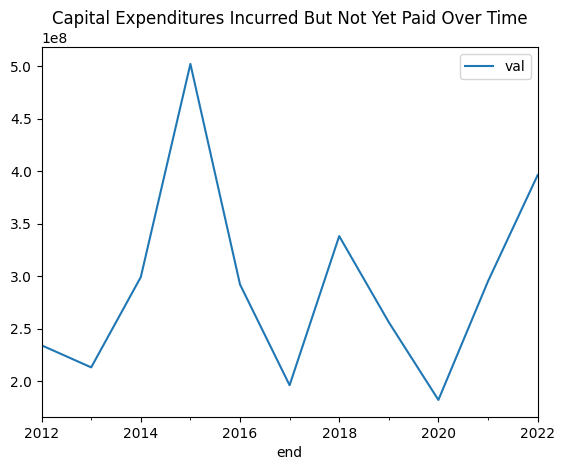

In [15]:
unpaid_capita_data.plot(x='end', y='val', title='Capital Expenditures Incurred But Not Yet Paid Over Time')
plt.show()

## Analysis of Net Income/Loss

In [16]:
# Filter out the operating income/loss data
net_income_loss = raw_data[raw_data['Metric'] == 'NetIncomeLoss']

In [17]:
net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')

In [18]:
net_income_loss_data.head()

,EntityName,CIK,Metric,start,end,val,year,quarter
20,THE BOEING COMPANY,12927,NetIncomeLoss,2007-01-01,2007-12-31,4074000000,2007,5
26,THE BOEING COMPANY,12927,NetIncomeLoss,2008-01-01,2008-12-31,2672000000,2008,5
28,THE BOEING COMPANY,12927,NetIncomeLoss,2009-01-01,2009-03-31,610000000,2009,1
33,THE BOEING COMPANY,12927,NetIncomeLoss,2009-04-01,2009-06-30,998000000,2009,2
38,THE BOEING COMPANY,12927,NetIncomeLoss,2009-07-01,2009-09-30,-1564000000,2009,3


## Analysis of Assets

In [19]:
# Filter out the Assets
assets = raw_data[raw_data['Metric'] == 'Assets']

In [20]:
assets_data = prepare_and_sort_financial_data(raw_data, 'Assets')

In [22]:
assets_data.head(5)

,EntityName,CIK,Metric,start,end,val,year,quarter
300,THE BOEING COMPANY,12927,Assets,NaN,2008-12-31,53779000000,2008,5
307,THE BOEING COMPANY,12927,Assets,NaN,2009-12-31,62053000000,2009,5
315,THE BOEING COMPANY,12927,Assets,NaN,2010-12-31,68565000000,2010,5
323,THE BOEING COMPANY,12927,Assets,NaN,2011-12-31,79986000000,2011,5
331,THE BOEING COMPANY,12927,Assets,NaN,2012-12-31,88896000000,2012,5


In [ ]:
print(assets_data.describe())

In [ ]:
assets_data.plot(x='end', y='val', title='Assets Over Time')
plt.show()

# Merge the Data

In [23]:
df_merged = pd.merge(assets_data, net_income_loss_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_assets', '_net_income_loss'))

In [25]:
df_merged = pd.merge(df_merged, unpaid_capita_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer')
                     

In [33]:
df_merged.rename(columns={'val_assets': 'Assets', 
                          'val_net_income_loss': 'NetIncomeLoss',
                          'val': 'UnpaidCapita'}, inplace=True)

In [ ]:
# Filtering out the annual data (rows where quarter is '5')
#df_merged_quarterly = df_merged[df_merged['quarter']] != 5]

In [46]:
df_merged.head(5)

,EntityName,CIK,Metric_assets,start_assets,end,Assets,year,quarter,Metric_net_income_loss,start_net_income_loss,NetIncomeLoss,Metric,start,UnpaidCapita
0,THE BOEING COMPANY,12927,Assets,NaN,2008-12-31,5.377900e+10,2008,5,NetIncomeLoss,2008-01-01,2672000000,NaN,NaN,NaN
1,THE BOEING COMPANY,12927,Assets,NaN,2009-12-31,6.205300e+10,2009,5,NetIncomeLoss,2009-01-01,1312000000,NaN,NaN,NaN
2,THE BOEING COMPANY,12927,Assets,NaN,2010-12-31,6.856500e+10,2010,5,NetIncomeLoss,2010-01-01,3307000000,NaN,NaN,NaN
3,THE BOEING COMPANY,12927,Assets,NaN,2011-12-31,7.998600e+10,2011,5,NetIncomeLoss,2011-01-01,4018000000,NaN,NaN,NaN
4,THE BOEING COMPANY,12927,Assets,NaN,2012-12-31,8.889600e+10,2012,5,NetIncomeLoss,2012-01-01,3900000000,CapitalExpendituresIncurredButNotYetPaid,2012-01-01,234000000.0


# Calculation

**Investment Efficiency:**
    
    - `CapitalExpendituresIncurredButNotYetPaid`(UnpaidCapita)
    - `NetIncomeLoss`
    - `Assets`
    - **Calculation:** Calculation: Return on Investment (ROI) = Net Income / (Assets - Capital Expenditures Incurred But Not Yet Paid)

In [35]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [36]:
# Convert financial values from cents to millions for readability
df_final['Assets'] /= 1000000
df_final['NetIncomeLoss'] /= 1000000
df_final['UnpaidCapita'] /= 1000000

In [37]:
# Ensure that division by zero is handled by replacing zero denominators with NaN
# Calculate Return on Investment (ROI)
df_final['ROI'] = df_final.apply(
    lambda row: row['NetIncomeLoss'] / (row['Assets'] - row['UnpaidCapita']) 
    if (row['Assets'] - row['UnpaidCapita']) != 0 
    else None, axis=1)

# Calculate Return on Assets (ROA)
df_final['ROA'] = df_final.apply(
    lambda row: row['NetIncomeLoss'] / row['Assets'] 
    if row['Assets'] != 0 
    else None, axis=1)

In [38]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'ROI', 'ROA', 'year', 'quarter']]


In [39]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'quarter': 'Quarter', 'year': 'Year', 'end': 'DATE'}, inplace=True)

In [42]:
# Filtering on annual values only
filtered_df = df_copy[df_copy['Quarter'] == 5]

In [44]:
filtered_df.head()

,ENTITY,CIK,DATE,ROI,ROA,Year,Quarter
0,THE BOEING COMPANY,12927,2008-12-31,NaN,0.049685,2008,5
1,THE BOEING COMPANY,12927,2009-12-31,NaN,0.021143,2009,5
2,THE BOEING COMPANY,12927,2010-12-31,NaN,0.048232,2010,5
3,THE BOEING COMPANY,12927,2011-12-31,NaN,0.050234,2011,5
4,THE BOEING COMPANY,12927,2012-12-31,0.043987,0.043871,2012,5


# Visualization

In [45]:
import plotly.express as px


# Plotting ROI and ROA over time 
fig = px.line(filtered_df, x='DATE', y=['ROI', 'ROA'],
              labels={'value': 'Ratio Values', 'variable': 'Ratios'},
              title='Interactive ROI and ROA Over Time')

# Interactive features
fig.update_traces(mode='lines+markers')
fig.update_layout(hovermode='x unified')
fig.show()
